# Exploratory Data Analysis (EDA) – Diagnostic Analysis

## Monthly Sales Growth Analysis

## What is the percentage growth in total monthly sales over time, and how does it vary across different months?

### 1. Overview

This analysis investigates the monthly progression of total sales, focusing on identifying trends, fluctuations, and growth patterns
across time. By calculating the percentage growth rate of sales month-over-month, we gain insights into how well the business is scaling
and where seasonal or operational factors may be influencing performance. A dual-axis visualization enhances interpretability by 
combining total sales (bar chart) with monthly growth rates (line chart) to tell a cohesive story of revenue dynamics.

### 2. Goal

- Evaluate how total sales evolve across different months.
- Quantify monthly sales performance through growth rates.
- Identify high-growth and low-growth periods to spot seasonal or strategic impacts.
- Provide visual insights that support better decision-making and business forecasting.

### 3. Business Challenge

- Inconsistent sales performance: Management lacks clarity on why some months underperform while others spike.
- Uncertainty in strategy execution: It’s unclear whether recent sales strategies are yielding consistent month-over-month improvements.
- Limited visibility into growth dynamics: Without quantifying growth, it’s hard to identify whether revenue growth is sustainable
  or driven by short-term factors.

### 4. Methodology

- Clean and aggregate data to ensure accurate insights and avoid distorted growth metrics.
- Perform diagnostic analysis on total monthly sales using historical data.
- Compute and visualize month-over-month growth rates to identify patterns and anomalies.
- Create a dual-axis plot to present both sales volume and growth trajectory in a single, intuitive visualization.
- Translate findings into strategic recommendations—highlighting months with explosive or declining growth for targeted business actions.

### Import necessary libraries

In [9]:
import pandas as pd
import os
import glob

### Combine the sales data from all months into a single consolidated CSV file

In [11]:
folder_path = r"C:\Monthly_Sales"

# Retrieve all CSV files from the folder using glob
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# All CSV files combined as one DataFrame 
all_data = pd.concat([pd.read_csv(file) for file in all_files], ignore_index=True)

# Merged DataFrame saved into a new CSV
output_file = os.path.join(folder_path, "all_data.csv")
all_data.to_csv(output_file, index=False)

print("All files integrated into:", output_file)

All files integrated into: C:\Monthly_Sales\all_data.csv


### Load the updated DataFrame

In [13]:
# Skip Blank Rows if present in the dataset

df = pd.read_csv(r'C:\Monthly_Sales\all_data.csv', skip_blank_lines=True)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
0,175667,iPhone,1,700.0,04/24/24 19:12,"135 Meadow St, Boston, MA 02215"
1,175668,AA Batteries (4-pack),1,5.84,04/20/24 13:45,"592 4th St, San Francisco, CA 94016"
2,175669,AA Batteries (4-pack),1,5.84,04/28/24 09:17,"632 Park St, Dallas, TX 75001"
3,175670,AA Batteries (4-pack),2,5.84,04/23/24 14:06,"131 Pine St, San Francisco, CA 94016"
4,175671,Samsung Odyssey Monitor,1,409.99,04/23/24 12:13,"836 Forest St, Boston, MA 02215"


In [14]:
df.shape

(8108959, 6)

## Data Cleaning Process

Thoroughly clean and standardize the data to eliminate errors, ensure consistency, and build a solid foundation for meaningful insights.

### Find and remove rows with NaN values

In [17]:
df.isna().sum()

Order ID            21056
Product Name        21056
Units Purchased     21058
Unit Price          21058
Order Date          21059
Delivery Address    21060
dtype: int64

In [18]:
# If Nan value is present in Order ID and Unit Purchased, it will be impossible to manipulate the data.
# Therefore, drop Nan values in Order ID and Units Purchased.

df.dropna(subset=['Order ID', 'Units Purchased'], inplace=True)

In [19]:
# Check if Nan value is present

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     0
Unit Price          0
Order Date          1
Delivery Address    2
dtype: int64

In [20]:
# Further check if any NaN values or blank rows are present

blank_rows_na = df[df.isnull().any(axis=1)]
blank_rows_na

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
2195228,Charging Cable,1,14.95,05/24/24 07:04,"852 Hickory St, San Francisco, CA 94016",NaN
3001506,150766,iPhone,1,7,NaN,NaN


#### Find and remove rows with duplicate values

In [22]:
# Find duplicate values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
8108954     True
8108955     True
8108956     True
8108957     True
8108958     True
Length: 8087901, dtype: bool

In [23]:
# Remove duplicated values

df.drop_duplicates(inplace = True)

In [24]:
# Check again for duplicated values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
172530     False
2195228    False
3001506    False
6370083    False
6403571    False
Length: 171546, dtype: bool

### Verify and fix incorrect data types in the dataset

In [26]:
# check for data types

df.dtypes

Order ID            object
Product Name        object
Units Purchased     object
Unit Price          object
Order Date          object
Delivery Address    object
dtype: object

#### Fix incorrect data types

In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df['Units Purchased'] = pd. to_numeric(df['Units Purchased'], errors='coerce')

df['Unit Price'] = pd. to_numeric(df['Unit Price'], errors='coerce')

In [29]:
# Verify the presence of NaN values remaining in the columns as a result of using errors='coerce' during data conversion.

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     1
Unit Price          2
Order Date          3
Delivery Address    2
dtype: int64

In [30]:
df = df.dropna()

### Change the data type to optimize memory usage (Optional)

In [32]:
df['Order ID'] = pd.to_numeric(df['Order ID'], downcast='integer') 
df['Product Name'] = df['Product Name'].astype('category')  
df['Units Purchased'] = df['Units Purchased']. astype('int8') 
df['Unit Price'] = pd.to_numeric(df['Unit Price'], downcast='float')   
df['Delivery Address'] = df['Delivery Address'].astype('category') 

## Expand the dataset with supplementary columns

### Add month column

In [35]:
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4
...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10


In [36]:
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April
...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October


### Add week day column

In [38]:
df['Day of Week'] = df['Order Date'].dt.strftime('%a')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue
...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon


### Add hour column

In [40]:
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12
...,...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon,8
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed,22
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed,13
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon,16


### Add city column

In [42]:
def city(address):
    return address.split(",")[1].strip(" ")

def state_abbrev(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Delivery Address'].apply(lambda x: f"{city(x)}  ({state_abbrev(x)})")
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19,Boston (MA)
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13,San Francisco (CA)
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9,Dallas (TX)
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14,San Francisco (CA)
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12,Boston (MA)


### Organize Data by Order Date Chronologically and Reindex

In [44]:
df = df.sort_values(by = 'Order Date')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
78282,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
68761,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
64303,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
63092,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
74502,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
44457,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
30663,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
49246,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
30770,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


In [45]:
df = df.reset_index(drop=True)
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
1,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
2,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
3,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
4,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
171538,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
171539,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
171540,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
171541,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


#### Add Total Sales column

In [47]:
df['Total Sales'] = df['Units Purchased'] * df['Unit Price']
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.98999,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.98999
1,151041,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99000
2,146765,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99000
3,145617,Amana Washing Machine,1,600.00000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00000
4,156535,iPhone,1,700.00000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00000


#### Format Unit Price and Total Sales to 2 decimal places

In [49]:
df['Unit Price'] = df['Unit Price'].apply(lambda x: "%.2f" % x)

In [50]:
df['Total Sales'] = df['Total Sales'].apply(lambda x: "%.2f" % x)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00
4,156535,iPhone,1,700.00,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00


#### Format Unit Price and Total Sales to numeric

In [52]:
df['Unit Price'] = pd.to_numeric(df['Unit Price'])
df['Total Sales'] = pd.to_numeric(df['Total Sales'])

In [53]:
# Deep copy to avoid modifying the original DataFrame (df)
df_growth = df.copy(deep=True)

df_msg = df_growth.groupby('Month')['Total Sales'].sum().reset_index()

# Monthly Growth Rate (%)
df_msg['Growth Rate (%)'] = df_msg['Total Sales'].pct_change() * 100

df_msg

,Month,Total Sales,Growth Rate (%)
0,1,4639312.17,NaN
1,2,1235017.71,-73.379293
2,3,2358783.67,90.991890
3,4,2619873.83,11.068847
4,5,2657978.27,1.454438
5,6,3408613.54,28.240835
6,7,2990038.42,-12.279923
7,8,3143681.87,5.138511
8,9,2368652.05,-24.653570
9,10,1760182.98,-25.688411


## Plot Monthly Total Sales ($) & Growth Rate (%)

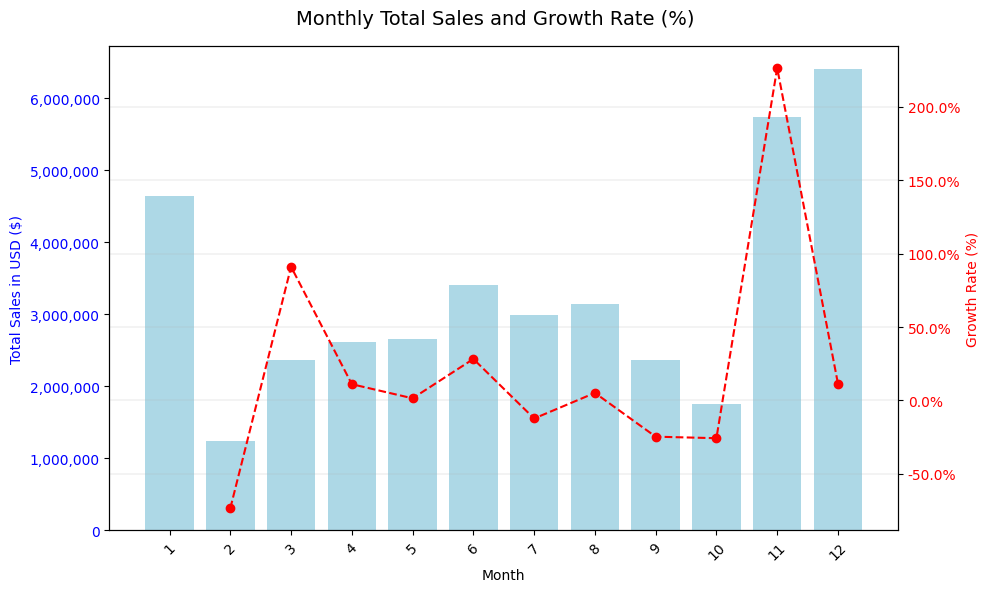

In [89]:
# Monthly Sales Growth Plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis: Total Sales as bar chart
ax1.bar(df_msg['Month'].astype(str), df_msg['Total Sales'], color='lightblue', label='Total Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales in USD ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Numeric and not scientific
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Right y-axis: Growth Rate as line plot
ax2 = ax1.twinx()
ax2.plot(df_msg['Month'].astype(str), df_msg['Growth Rate (%)'], color='red', linestyle='--', marker='o', label='Growth Rate (%)')
ax2.set_ylabel('Growth Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.1f}%'))

fig.suptitle('Monthly Total Sales and Growth Rate (%)', fontsize=14)
fig.tight_layout()
plt.grid(True, linewidth=0.2)

plt.show()

## Key Insights

1. High Volatility in Monthly Sales: The growth rates fluctuate significantly, with both steep declines (e.g., -73.38% in Month 2, -25.69% in Month 10) and sharp increases (e.g., +226.32% in Month 11, +90.99% in Month 23).

2. Exceptional Growth in Month 11: The highest sales growth occurred in Month 11 (+226.32%), likely due to a seasonal or promotional event.     This also marks the peak in total sales ($5.74M).

3. Absolute peak occurred in Month 12 ($6.40M) with sales growth of +11.51%.

4. Sustained Growth Toward Year-End: Despite mid-year dips (Months 7 to 10), Months 11 and 12 show strong recovery and surpass all previous months in both growth and absolute sales.

5. Underperformance Early in the Year: Month 2 experienced a dramatic -73.38% drop from Month 1, suggesting either a data anomaly or external factor disrupting sales continuity.

## Strategic Recommendations

1. Investigate Sales Drop Causes: Analyze Months 2, 9, and 10 to determine the reasons behind sharp declines. This can uncover operational inefficiencies, seasonal patterns, or external disruptions that can be mitigated in future planning.

2. Capitalize on Peak Months (11 & 12): Strengthen promotional activities around these high-performing months. Consider expanding festive campaigns or bundling offers to extend the momentum.

3. Stabilize Mid-Year Growth: Develop a mid-year marketing boost strategy (Months 5–9) using loyalty incentives, product refreshes, or geo-targeted ads to maintain momentum.

4. Build Forecast Models: Use this growth trend as input for predictive models to anticipate low-performing months and proactively plan inventory, staffing, and promotional efforts.

5. Apply Data-Driven Planning: Set monthly sales targets using historical growth data. Tailor resource allocation and budgeting based on expected performance to reduce surprises.